1. Импорт библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

2. Загружаем набор данных

In [3]:
df = pd.read_csv('heart_disease.csv')
df

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [4]:
for column in df.columns:
  print(column)

age
sex
chest pain type
resting blood pressure
serum cholestoral in mg/dl      
fasting blood sugar > 120 mg/dl 
resting electrocardiographic results
maximum heart rate achieved  
exercise induced angina    
oldpeak 
slope of peak
number of major vessels 
thal
Disease


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral in mg/dl            270 non-null    int64  
 5   fasting blood sugar > 120 mg/dl       270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   maximum heart rate achieved           270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    int64  
 11  number of major ves

3. Пропущенные значения

In [7]:
print(df.isnull().sum()) 

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


In [6]:
np.random.seed(42)
df_test_nan = df.copy()
df_test_nan.loc[np.random.choice(df_test_nan.index, size=5, replace=True), 'serum cholestoral in mg/dl      '] = np.nan
df_test_nan

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal,Disease
0,70,1,4,130,322.0,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564.0,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261.0,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263.0,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269.0,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199.0,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263.0,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294.0,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192.0,0,0,148,0,0.4,2,0,6,0


In [7]:
print(df_test_nan.isnull().sum())

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              5
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


3.1 Удаление строк с пропусками

In [8]:
df_drop = df_test_nan.dropna()
print(df.isnull().sum())

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


3.2. Заполнение пропусков медианой 

In [13]:
df_median = df_test_nan.copy()
df_median['serum cholestoral in mg/dl      '] = df_median['serum cholestoral in mg/dl      '].fillna(df_median['serum cholestoral in mg/dl      '].median())
print("\n# Заполнение пропусков медианой")
print(df_median.isnull().sum())


# Заполнение пропусков медианой
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


3.3 Заполнение пропусков средним

In [16]:
df_mean = df_test_nan.copy()
df_mean.columns = df_mean.columns.str.strip()
df_mean['serum cholestoral in mg/dl'] = df_mean['serum cholestoral in mg/dl'].fillna(df_mean['serum cholestoral in mg/dl'].mean())
print("\n# Заполнение пропусков средним")
print(df_mean.isnull().sum())


# Заполнение пропусков средним
age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral in mg/dl              0
fasting blood sugar > 120 mg/dl         0
resting electrocardiographic results    0
maximum heart rate achieved             0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
number of major vessels                 0
thal                                    0
Disease                                 0
dtype: int64


4. Выбираем целевую переменную

В качестве целевой выбрала категориальную переменную Disease
1: heart disease, 0: Normal

In [9]:
Y = df['Disease']
X = df.drop('Disease', axis=1)

5. Графический анализ

In [10]:
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
numeric_cols

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


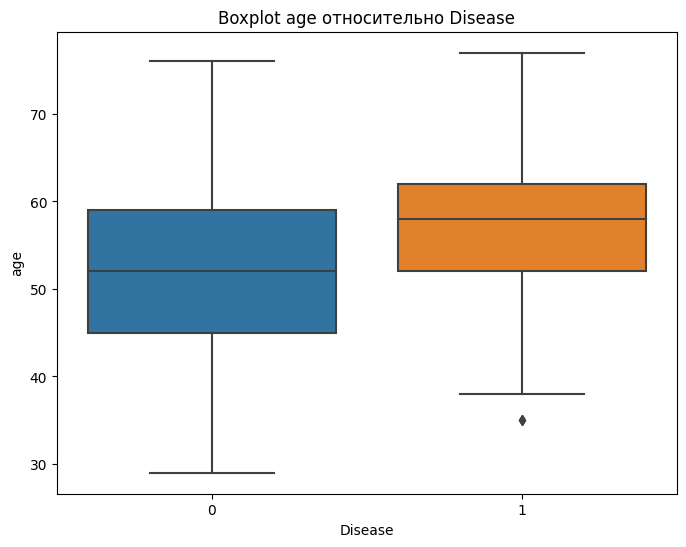

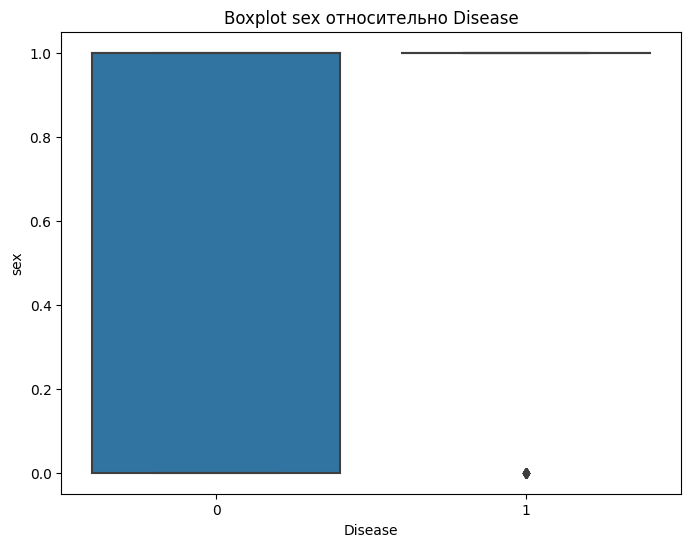

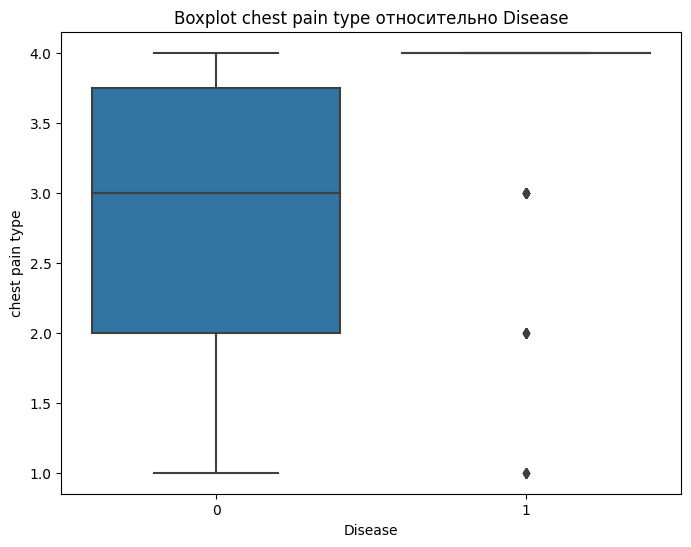

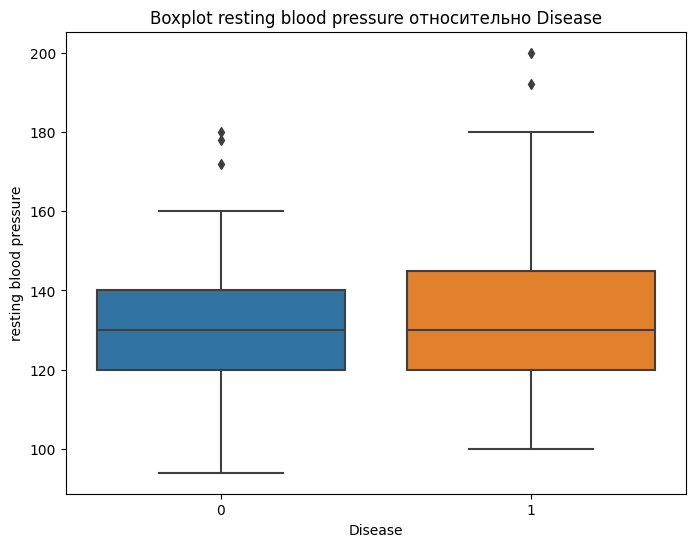

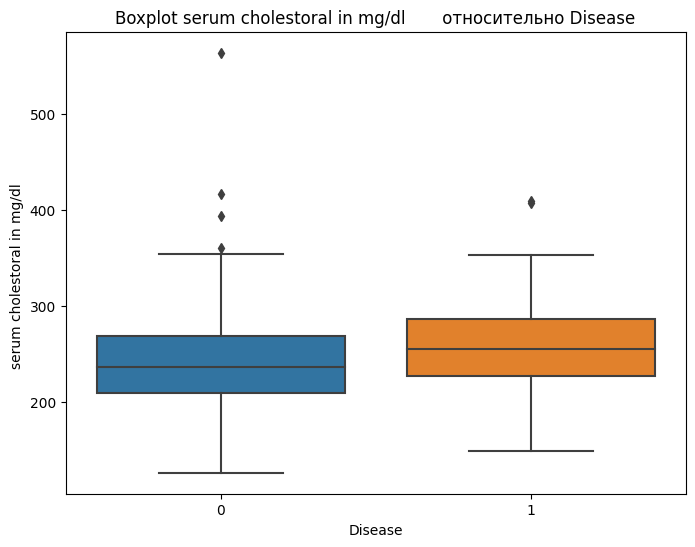

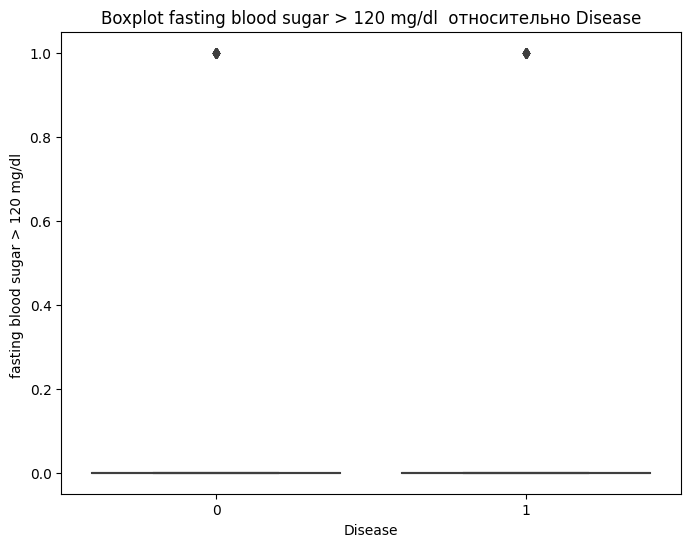

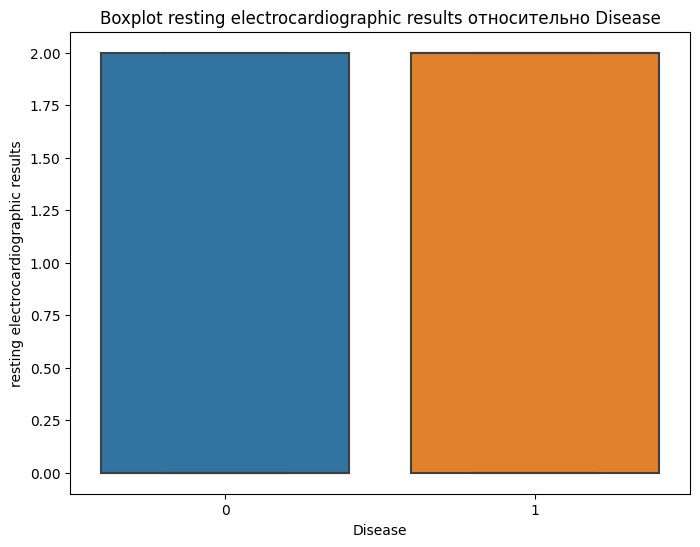

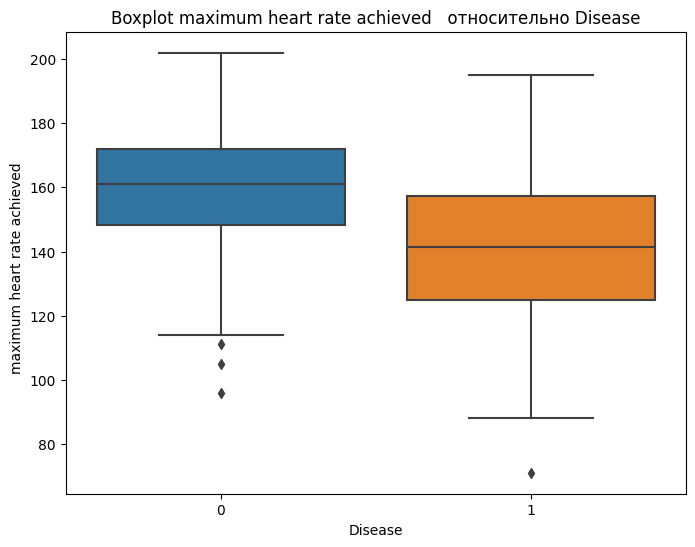

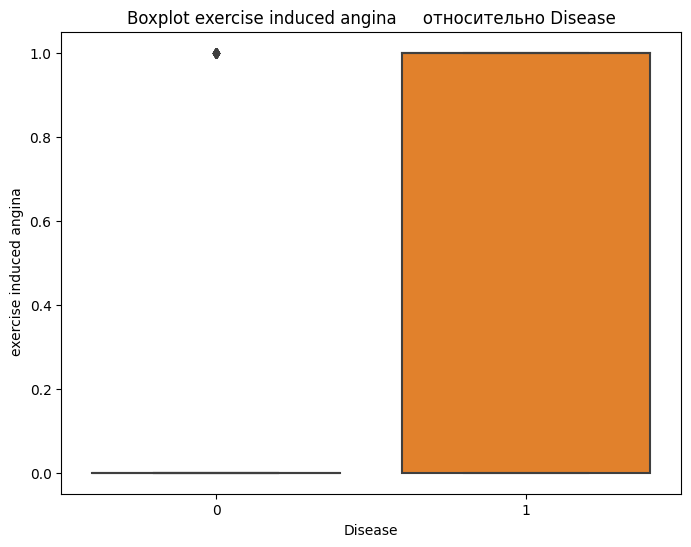

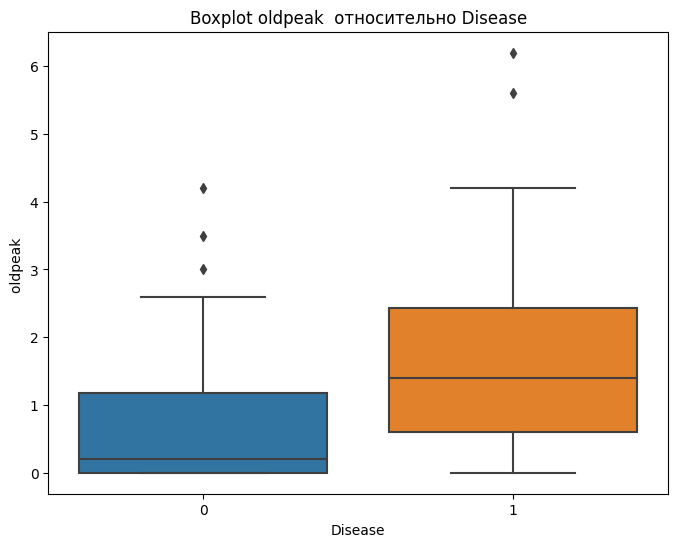

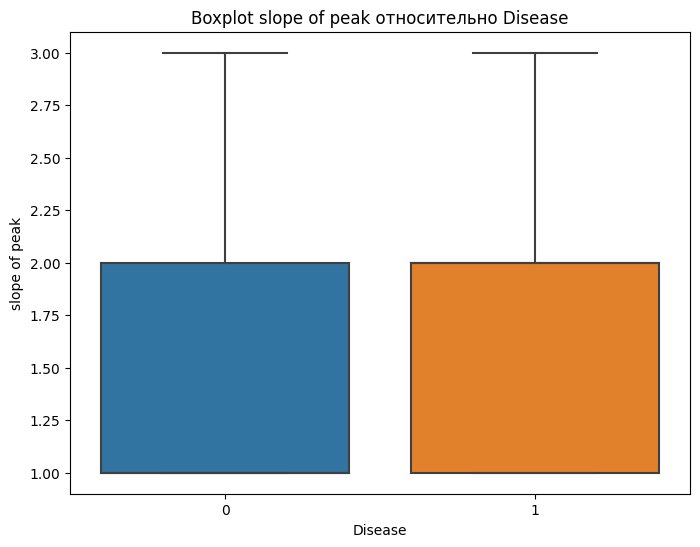

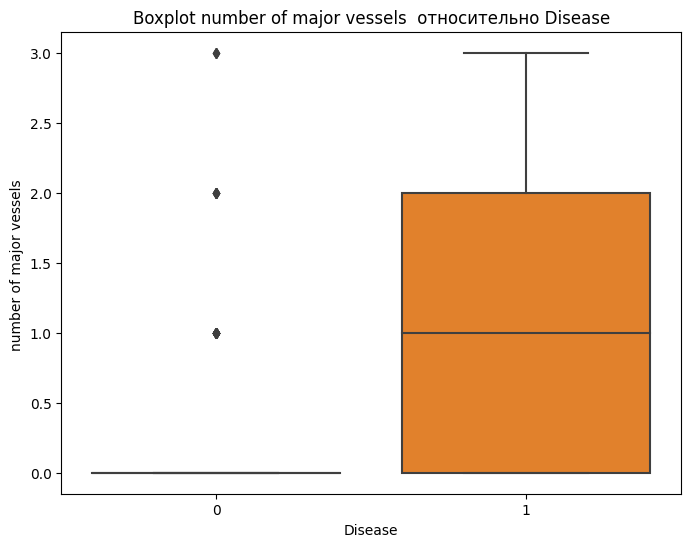

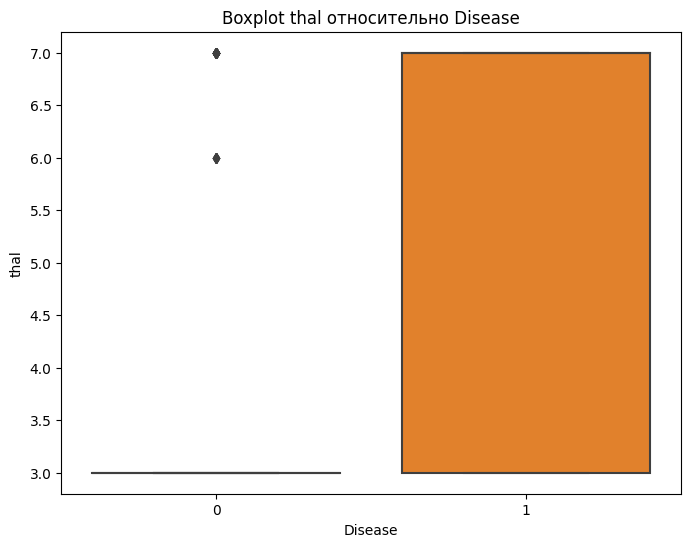

In [9]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Disease', y=col, data=df)
    plt.title(f'Boxplot {col} относительно Disease')
    plt.show()

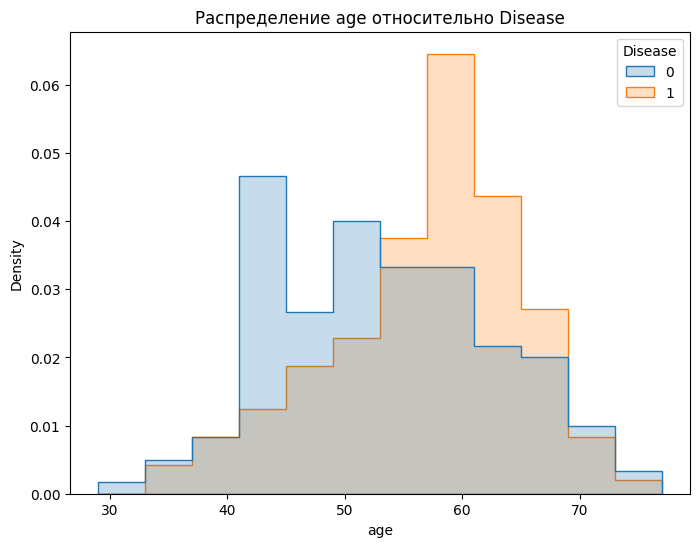

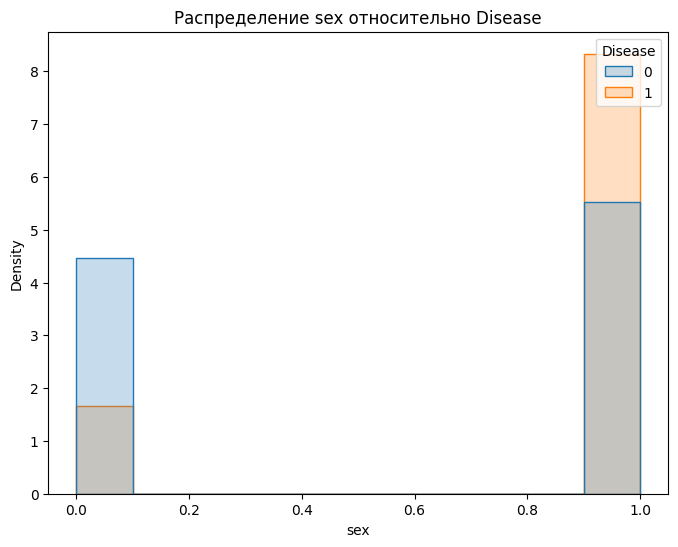

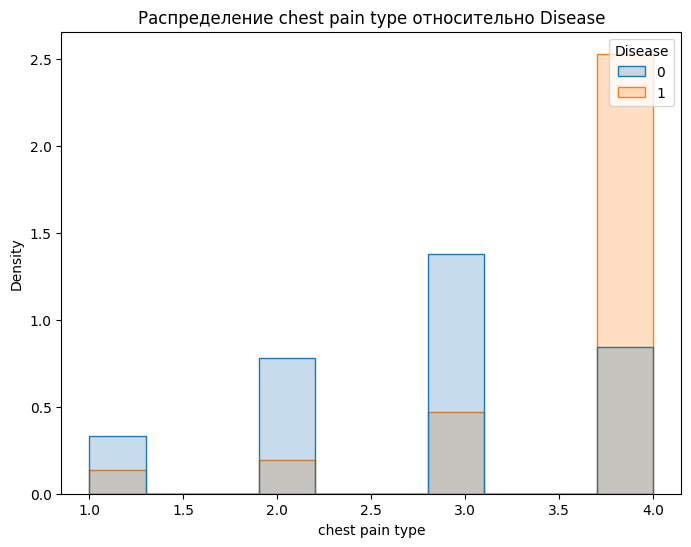

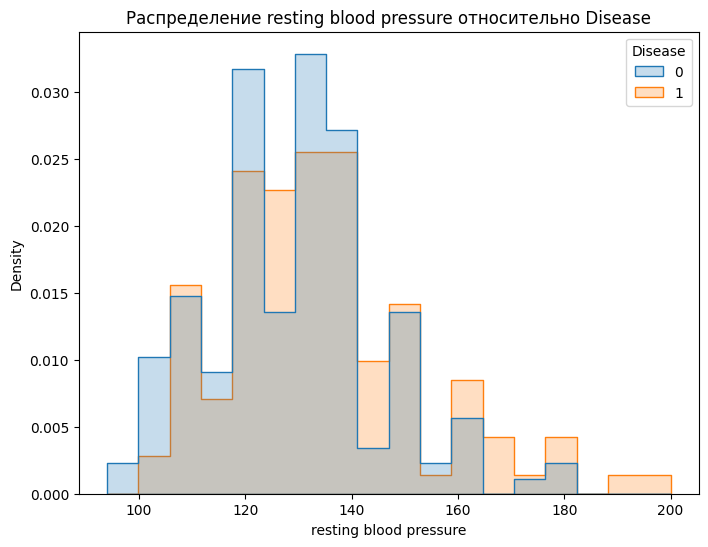

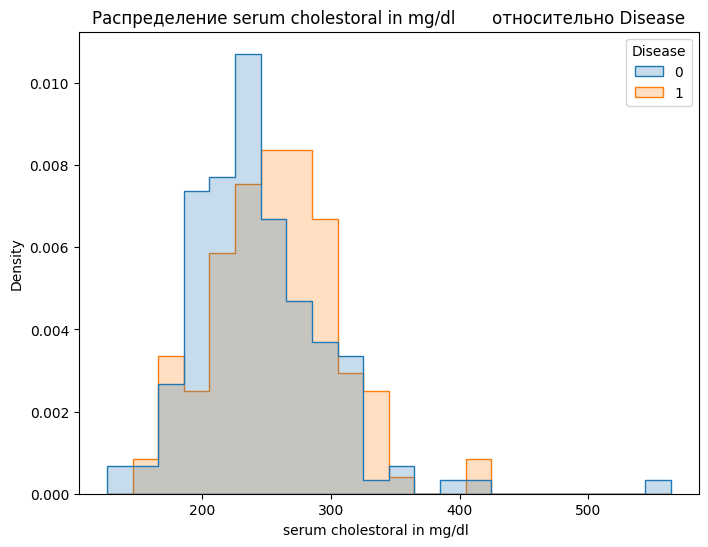

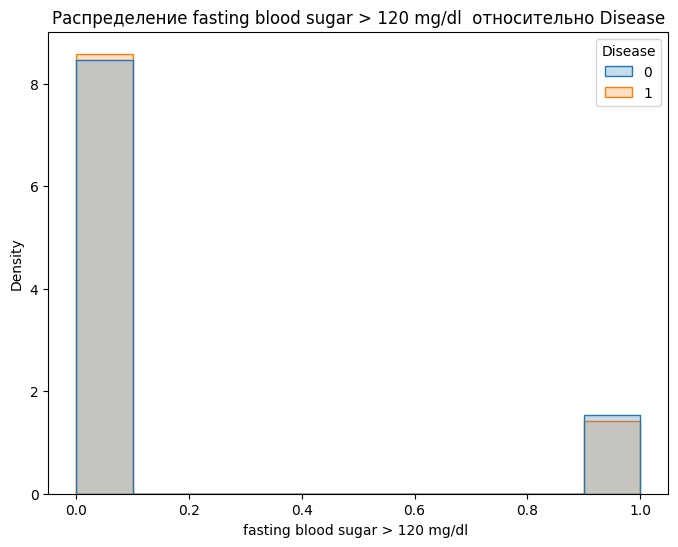

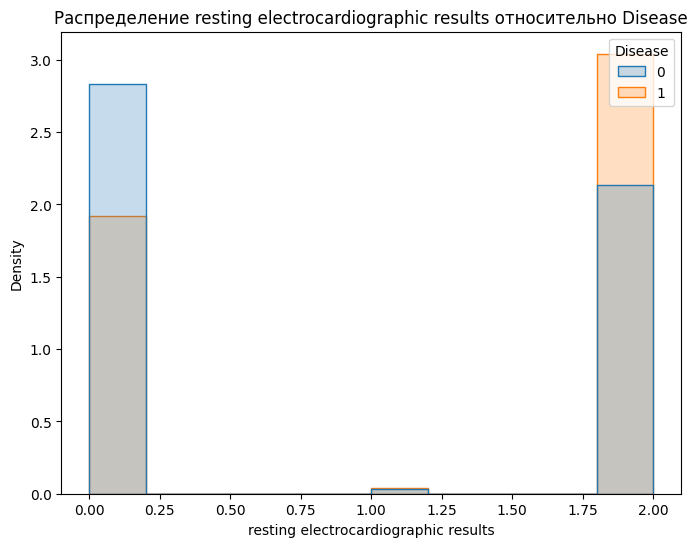

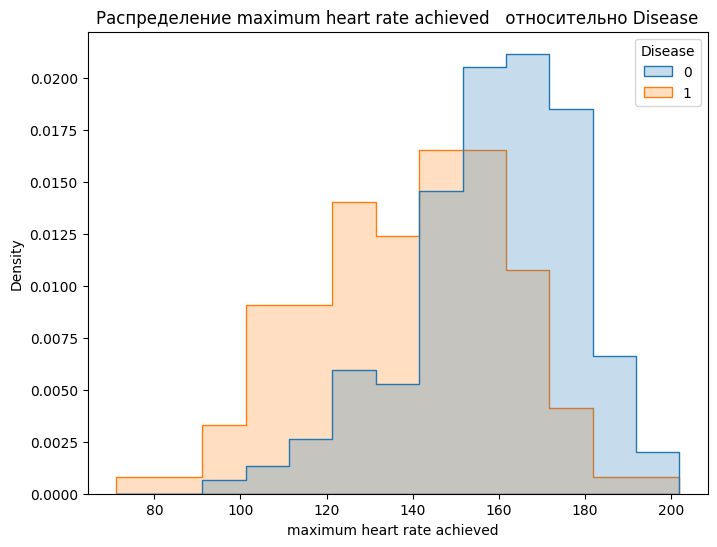

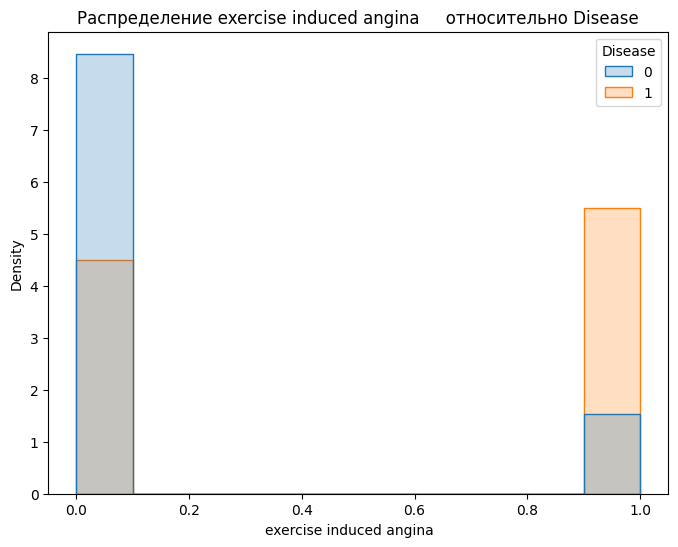

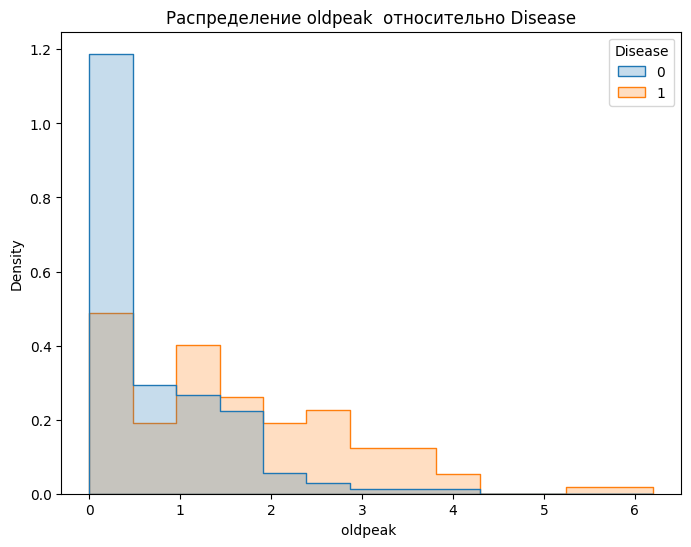

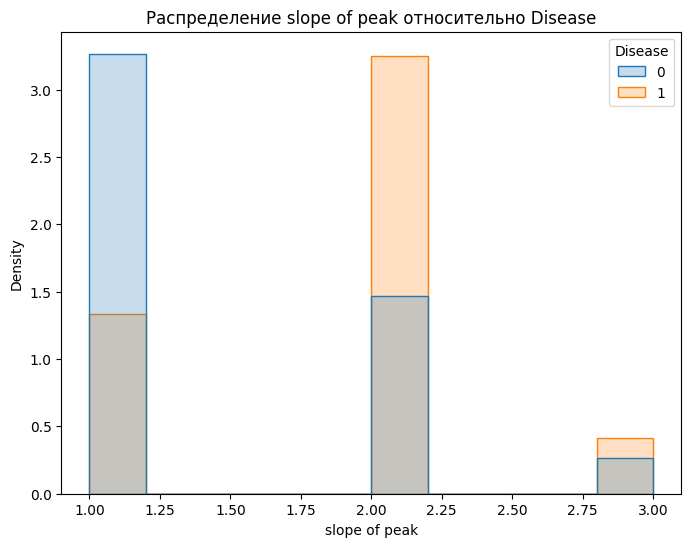

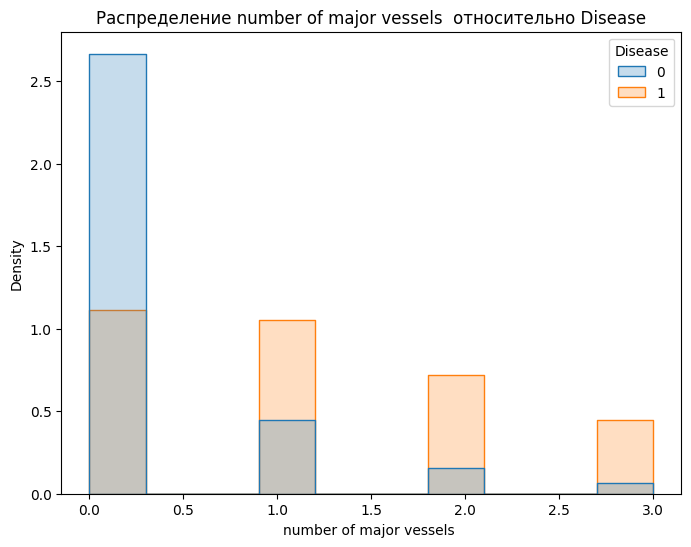

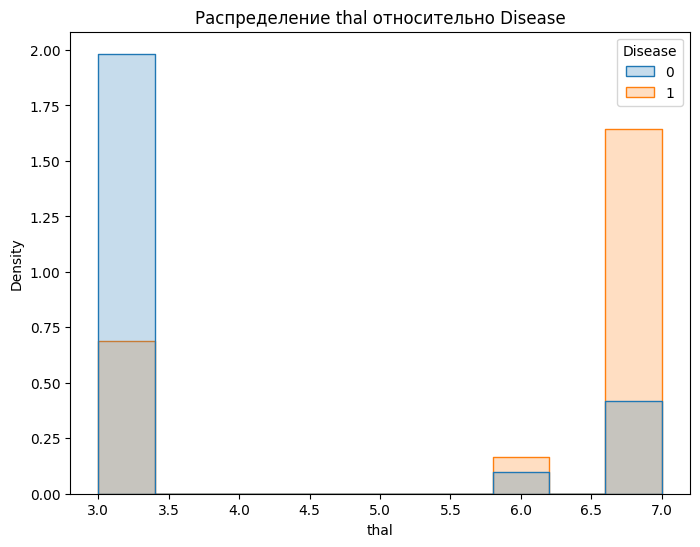

In [10]:
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='Disease', element="step", stat="density", common_norm=False)
    plt.title(f'Распределение {col} относительно Disease')
    plt.show()

Интересные графики:

Возраст (age) относительно болезни сердца (Disease):

    Сердечные чаще встречается в возрасте от 55 до 65 лет.
    Здоровые люди (синий) более распространены в возрасте от 40 до 50 лет.
    Возраст - важный признак для определения наличия заболевания, риск повышается с возрастом

Пол (sex) относительно болезни (Disease):

    Видно, что заболевание значительно чаще встречается среди мужчин (1)

Тип боли в груди (chest pain type) относительно болезни (Disease):

    Тип боли в груди 4 основном наблюдается у людей с болезнью.
    Типы 2 и 3 также имеют некоторую взаимосвязь с наличием заболевания, но менее выражены по сравнению с типом 4
    
Пульс

    Пульс ниже у людей с заболеванием сердца.



In [12]:
desc_stats_numeric = df.groupby('Disease')[df.select_dtypes(include=[np.number]).columns].describe()
desc_stats_numeric

age                                                       sex  \
         count       mean       std   min   25%   50%   75%   max  count   
Disease                                                                    
0        150.0  52.706667  9.509830  29.0  45.0  52.0  59.0  76.0  150.0   
1        120.0  56.591667  8.116273  35.0  52.0  58.0  62.0  77.0  120.0   

                   ... thal      Disease                                     
             mean  ...  75%  max   count mean  std  min  25%  50%  75%  max  
Disease            ...                                                       
0        0.553333  ...  3.0  7.0   150.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1        0.833333  ...  7.0  7.0   120.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 112 columns]

5. Описание полученных результатов

In [29]:
numeric_cols

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,slope of peak,number of major vessels,thal
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [10]:
for col in numeric_cols:
    print(f"Описательная статистика для {col}:\n")
    print(df.groupby('Disease')[col].describe())
    print("\n" + "="*50 + "\n")

Описательная статистика для age:

         count       mean       std   min   25%   50%   75%   max
Disease                                                          
0        150.0  52.706667  9.509830  29.0  45.0  52.0  59.0  76.0
1        120.0  56.591667  8.116273  35.0  52.0  58.0  62.0  77.0


Описательная статистика для sex:

         count      mean       std  min  25%  50%  75%  max
Disease                                                    
0        150.0  0.553333  0.498813  0.0  0.0  1.0  1.0  1.0
1        120.0  0.833333  0.374241  0.0  1.0  1.0  1.0  1.0


Описательная статистика для chest pain type:

         count      mean       std  min  25%  50%   75%  max
Disease                                                     
0        150.0  2.820000  0.927362  1.0  2.0  3.0  3.75  4.0
1        120.0  3.616667  0.779823  1.0  4.0  4.0  4.00  4.0


Описательная статистика для resting blood pressure:

         count        mean        std    min    25%    50%    75%    max
Diseas

1. **Возраст (age):**

   Пациенты с заболеванием в среднем старше (56.6 лет) по сравнению с теми, у кого заболевания нет (52.7 лет). Это указывает на то, что возраст может быть связан с повышенным риском заболевания.
   Минимальные и максимальные значения возраста в обеих группах примерно схожи — от 29-35 лет до 76-77 лет.

2. **Пол (sex):**

   Доля мужчин выше среди пациентов с заболеванием (mean = 0.83), чем среди тех, у кого его нет (mean = 0.55). Это может говорить о том, что мужчины чаще подвержены данному заболеванию.

3. **Тип боли в груди (chest pain type):**

   У пациентов с заболеванием средний тип боли в груди выше (3.62 против 2.82), что может означать, что более сильные типы болей чаще связаны с наличием заболевания.

4. **Артериальное давление в состоянии покоя (resting blood pressure):**

   Среднее артериальное давление выше у пациентов с заболеванием (134.4 мм рт. ст.) по сравнению с пациентами без заболевания (128.9 мм рт. ст.). Это может указывать на связь повышенного давления с риском заболевания.

5. **Уровень холестерина в сыворотке крови (serum cholestoral in mg/dl):**

   Пациенты с заболеванием имеют более высокий средний уровень холестерина (256.5 мг/дл) по сравнению с пациентами без заболевания (244.2 мг/дл), что может говорить о связи высокого холестерина с риском заболевания.

6. **Уровень сахара натощак выше 120 мг/дл (fasting blood sugar > 120 mg/dl):**

   Доля пациентов с уровнем сахара выше 120 мг/дл в обеих группах примерно одинакова (около 15%). Этот показатель, вероятно, не является решающим фактором для наличия заболевания.

7. **Результаты электрокардиографического исследования (resting electrocardiographic results):**

   Пациенты с заболеванием имеют более высокий средний результат (1.23 против 0.86), что может указывать на характерные изменения в электрокардиограмме, связанные с наличием заболевания.
   Разброс значений (std) примерно одинаковый в обеих группах (около 1.0).

8. **Максимальная частота сердечных сокращений (maximum heart rate achieved):**

   У пациентов без заболевания средняя максимальная частота сердечных сокращений выше (158.3 против 138.9), что может говорить о лучшей физической форме и меньшем уровне риска заболевания.

9. **Стенокардия, вызванная физической нагрузкой (exercise induced angina):**

   У пациентов с заболеванием доля тех, кто испытывает стенокардию при нагрузке, выше (mean = 0.55) по сравнению с пациентами без заболевания (mean = 0.15). Это может говорить о большей частоте стенокардии среди больных.

10. **Снижение сегмента (Депрессия) ST (oldpeak):**

    Среднее значение снижения сегмента ST (oldpeak) выше у пациентов с заболеванием (1.58 против 0.62), что указывает на наличие ишемических изменений у больных.
    Разброс значений (std) также выше у пациентов с заболеванием (1.28 против 0.80), что говорит о большей вариативности этого показателя среди больных.

11. **Наклон пика сегмента ST (slope of peak):**

    У пациентов с заболеванием среднее значение наклона пика выше (1.82 против 1.40), что может свидетельствовать о наличии аномалий сегмента ST.
    Разброс значений (std) примерно одинаковый (0.56 и 0.59), что говорит о схожей вариативности.

12. **Количество крупных сосудов, окрашенных флюороскопией (number of major vessels):**

    У пациентов с заболеванием среднее количество крупных сосудов выше (1.15 против 0.29), что может свидетельствовать о более значительных проблемах с сосудами.

13. **Талиевый стресс-тест (thal):**

    Среднее значение параметра "thal" выше у пациентов с заболеванием (5.83 против 3.79).

6.   Расчет теста Пирсона

Коэффициенты корреляции Пирсона для каждого признака


In [20]:
df.columns = df.columns.str.strip()
df['sex'] = df['sex'].astype("category")
df['chest pain type'] = df['chest pain type'].astype("category")
df['fasting blood sugar > 120 mg/dl'] = df['fasting blood sugar > 120 mg/dl'].astype("category")
df['resting electrocardiographic results'] = df['resting electrocardiographic results'].astype('category')
df['exercise induced angina'] = df['exercise induced angina'].astype('category')
df['slope of peak'] = df['slope of peak'].astype('category')
df['thal'] = df['thal'].astype('category')
df['Disease'] = df['Disease'].astype('category')
df['number of major vessels'] = df['number of major vessels'].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   age                                   270 non-null    int64   
 1   sex                                   270 non-null    category
 2   chest pain type                       270 non-null    category
 3   resting blood pressure                270 non-null    int64   
 4   serum cholestoral in mg/dl            270 non-null    int64   
 5   fasting blood sugar > 120 mg/dl       270 non-null    category
 6   resting electrocardiographic results  270 non-null    category
 7   maximum heart rate achieved           270 non-null    int64   
 8   exercise induced angina               270 non-null    category
 9   oldpeak                               270 non-null    float64 
 10  slope of peak                         270 non-null    category
 11  number

In [21]:
df[df.select_dtypes(include=[np.number]).columns].corr()

,age,resting blood pressure,serum cholestoral in mg/dl,maximum heart rate achieved,oldpeak
age,1.000000,0.273053,0.220056,-0.402215,0.194234
resting blood pressure,0.273053,1.000000,0.173019,-0.039136,0.222800
serum cholestoral in mg/dl,0.220056,0.173019,1.000000,-0.018739,0.027709
maximum heart rate achieved,-0.402215,-0.039136,-0.018739,1.000000,-0.349045
oldpeak,0.194234,0.222800,0.027709,-0.349045,1.000000


maximum heart rate achieved	и Age (-0.402215):
Отрицательная корреляция между частотой сердечных сокращений и возрастом. Чем старше - тем ниже пульс.

maximum heart rate achieved	и oldpeak (-0.349045):
Чем ниже депрессия ST-сегмента - тем выше пульс.